In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
class CirculentGraph:
    def __init__(self, n, r):
        self.n = n
        self.r = r
        self.G = nx.Graph()
        self.build_graph()
        
    def build_graph(self):
        self.G.clear()
        self.G.add_nodes_from(range(self.n))
        
        # For each vertex, connect it to r neighbors (r is even for symmetric connections)
        half_r = self.r // 2
        for node in range(self.n):
            for offset in range(1, half_r + 1):
                neighbor = (node + offset) % self.n
                self.G.add_edge(node, neighbor)
                neighbor = (node - offset) % self.n
                self.G.add_edge(node, neighbor)

        # If r is odd, add the middle connection once (opposite vertex)
        if self.r % 2 == 1:
            for node in range(self.n):
                opposite = (node + self.n // 2) % self.n
                self.G.add_edge(node, opposite)

    def draw_graph(self, circular=True):
        if circular:
            pos = nx.circular_layout(self.G)
        else:
            pos = nx.spring_layout(self.G)

        nx.draw(self.G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
        plt.title(f"{self.r}-regular Circulent Graph: G_{self.n},{self.r}")
        plt.show()

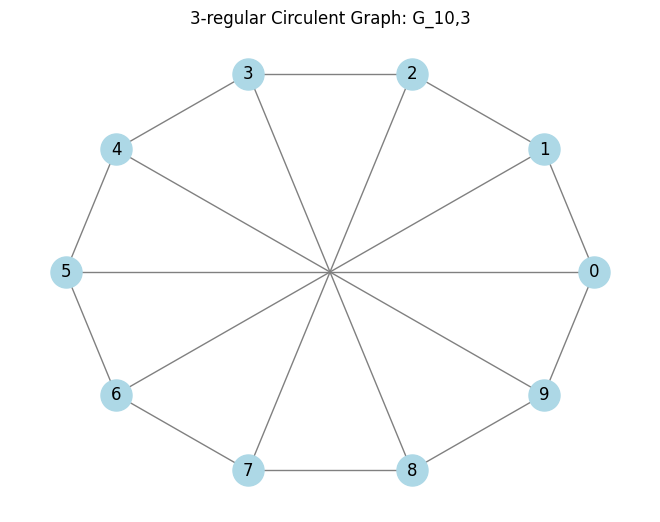

In [7]:
graph = CirculentGraph(10, 3)  # Example with n=10
graph.draw_graph(circular=True)  # Draw in circular layout